In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

import lightgbm as lgb
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from joblib import Parallel, delayed
from sklearn.preprocessing import OrdinalEncoder
import math
from xfeat import SelectCategorical, LabelEncoder, LambdaEncoder, Pipeline, ConcatCombination, SelectNumerical, \
    ArithmeticCombinations, TargetEncoder, aggregation, GBDTFeatureSelector, GBDTFeatureExplorer, CountEncoder

In [2]:
df = pd.read_pickle('../preprocessing/preprocess_df.pkl')
ID = 'id'
TARGET = 'price'

In [4]:
df['odometer_floor_10k'] = df['odometer'].apply(lambda x: math.floor(x / 10000) * 10000)
df['odometer_floor_1k'] = df['odometer'].apply(lambda x: math.floor(x / 1000) * 1000)

df["odometer_per_year"] = df["odometer"] / (2023 - df["year"])

In [5]:
num_df = SelectNumerical().fit_transform(df)
df[df.select_dtypes(include=object).columns.values] = df[df.select_dtypes(include=object).columns.values].fillna("null")

# カテゴリカル変数をラベルエンコーディング
encoder = Pipeline([
    SelectCategorical(),
    LabelEncoder(output_suffix=""),
])

le_df = encoder.fit_transform(df)
le_df.columns = [f'{col}_le' for col in le_df.columns]

In [7]:
df = pd.concat([num_df, le_df], axis=1)

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/pyt

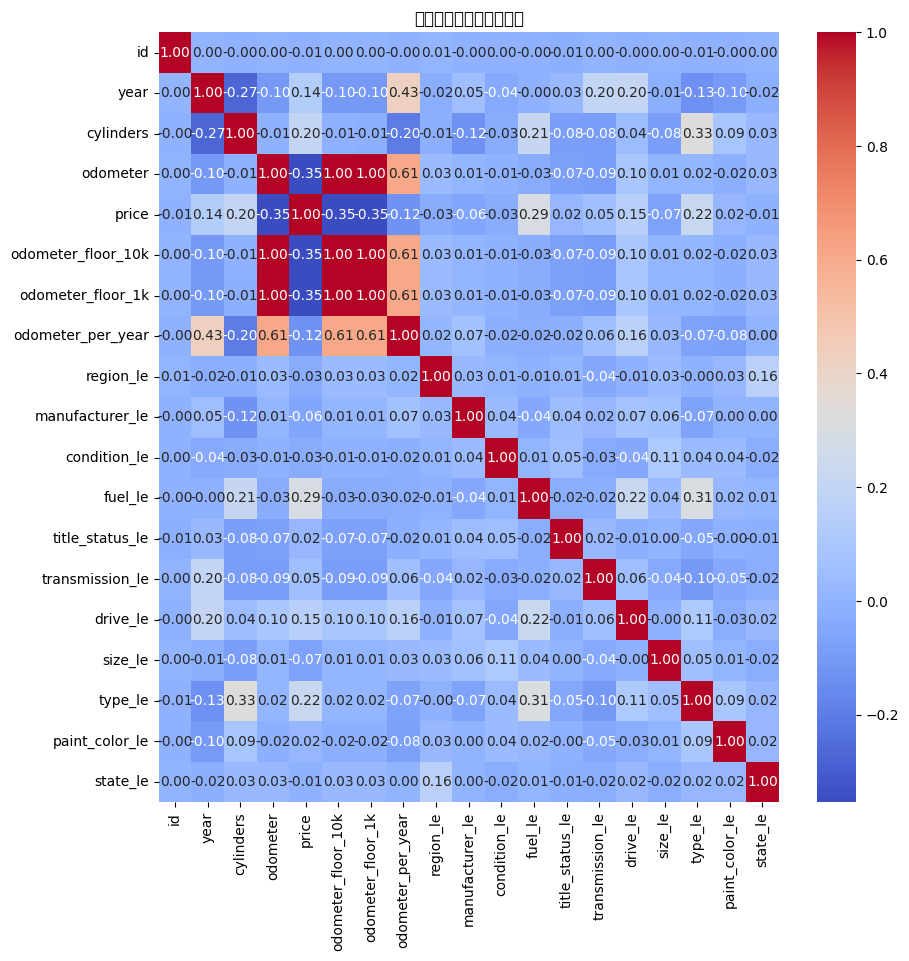

In [11]:
correlation_matrix = df.corr()

# ヒートマップとして相関行列を可視化
plt.figure(figsize=(10, 10))  # 図のサイズを指定（幅8インチ、高さ6インチ）
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('各列の相関ヒートマップ')
plt.show()

In [12]:
df = pd.read_pickle('../preprocessing/preprocess_df.pkl')

In [16]:
tmp_df = pd.DataFrame(df.region.unique())

In [18]:
tmp_df.columns = ['region']
tmp_df.to_csv('check_region.csv', index=False)

In [19]:
df = pd.read_pickle('../preprocessing/preprocess_df.pkl')
df.to_csv('train_test_data.csv', index=False)